# Introduction

The following table shows the descriptions of each feature of the dataframe, taken from M.A.I.O.R. concept design document supplied on Brightspace.

|Feature|Description|
|---|---|
|DATASOURCE|Unique Bus Operator Code|
|DAYOFSERVICE|Day of service. One day of service could last more than 24 hours|	  
|TRIPID|Unique trip code|
|LINEID|Unique line code|
|ROUTEID|Unique route code|
|DIRECTION|Route direction (IB = inboubnd/going/northbound/eastbound, OB = outbound/back/southbound/westbound)|
|PLANNEDTIME_ARR|Planned arrival time of the trip, in seconds|	                 
|PLANNEDTIME_DEP|Planned departure time of the trip, in seconds|
|ACTUALTIME_ARR|Actual arrival time of the trip, in seconds|
|ACTUALTIME_DEP|Actual departure time of the trip, in seconds|
|BASIN|Basin code|
|TENDERLOT| tender lot|
|SUPPRESSED|The whole trip has been suppressed (0=achieved, 1=suppressed)|
|JUSTIFICATIONID|Fault code|
|LASTUPDATE|Time of last recorded update|
|NOTE|Free note|

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [42]:
filename = '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/raw_data/rt_trips_DB_2018.txt'
df = pd.read_csv(filename, parse_dates=['DAYOFSERVICE', 'LASTUPDATE'], sep=';')

In [43]:
df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2526331,"


In [44]:
# check the data types
df.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                       object
dtype: object

In [45]:
# print some descriptors of the data
df.describe(datetime_is_numeric=True).T 

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,2182637,2018-06-28 17:25:38.969786880,2018-01-01 00:00:00,2018-03-31 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
TRIPID,2182637.0,7149479.174758,5955221.0,6592584.0,7110090.0,8018241.0,8592207.0,731442.265466
DIRECTION,2182637.0,1.504103,1.0,1.0,2.0,2.0,2.0,0.499983
PLANNEDTIME_ARR,2182637.0,55078.747653,18203.0,39683.0,55276.0,69006.0,91680.0,17424.822304
PLANNEDTIME_DEP,2182637.0,51533.29282,16200.0,36000.0,51600.0,65160.0,87600.0,17571.637274
ACTUALTIME_ARR,2045430.0,55062.38828,17546.0,39668.0,55189.0,69019.0,94378.0,17338.699154
ACTUALTIME_DEP,2018086.0,51706.116583,15974.0,36518.0,51618.0,65398.0,97177.0,17526.948184
TENDERLOT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,4333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JUSTIFICATIONID,4330.0,237554.867667,177856.0,205506.5,233851.5,271506.75,297899.0,34585.051789


We can see that the columns for 'PLANNEDTIME' and 'ACTUALTIME' departure and arrival are in seconds from midnight. The TENDERLOT column appears to hold no values, and so will be dropped from the dataset in the data quality plan.
We can also see that the SUPPRESSED and JUSTIFICATIONID columns appear to only have 4,330 rows of data, far less than the other columns' counts. The relevance of these columns will have to be examined further.

Columns to be dropped thus far:
* TENDERLOT

#### Changing dtypes

In [46]:
# select all columns with object datatype
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['DATASOURCE', 'LINEID', 'ROUTEID', 'BASIN', 'NOTE'], dtype='object')

In [47]:
# select columns with categorical data and add to list
categorical_cols = categorical_cols.append(df[['TRIPID', 'DIRECTION', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID']].columns)
categorical_cols

Index(['DATASOURCE', 'LINEID', 'ROUTEID', 'BASIN', 'NOTE', 'TRIPID',
       'DIRECTION', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID'],
      dtype='object')

In [48]:
# convert columns in the list to categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                category
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

For easier comparison later on, I will change the PLANNEDTIME columns to dtype float64

In [49]:
time_cols = df.select_dtypes(['int64']).columns
for col in time_cols:
    df[col] = df[col].astype('float64')
df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR           float64
PLANNEDTIME_DEP           float64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                category
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

#### Check for duplicate rows and null values

In [50]:
# check for duplicate rows
df.duplicated().value_counts()

False    2182637
dtype: int64

There are no duplicate rows in the dataframe.

Check rows are unique in terms of primary keys stated in Concept Design Extract
* TRIPID
* DAYOFSERVICE

In [53]:
df.drop_duplicates(subset=['TRIPID','DAYOFSERVICE'], inplace=True)
df.shape

(2182637, 16)

In [54]:
df.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
dtype: int64

There is a large number of missing values for the TENDERLOT, SUPPRESSED AND JUSTIFICATIONID columns. The ACTUALTIME columns also appear to be missing some data which will likely require dropping these rows from the dataset later on.

In [15]:
df.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

The above result shows the cardinality of the features in the dataset. We can see that some columns only hold one unqiue value. The value these columns add to the dataset will have to be examined further.

### Check the logical integrity of the data
#### Continuous features
I will first check that there are no negative values for any of the continuous columns. 

In [16]:
df.describe(datetime_is_numeric=True).T 

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,2182637,2018-06-28 17:25:38.969786880,2018-01-01 00:00:00,2018-03-31 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
PLANNEDTIME_ARR,2182637.0,55078.747653,18203.0,39683.0,55276.0,69006.0,91680.0,17424.822304
PLANNEDTIME_DEP,2182637.0,51533.29282,16200.0,36000.0,51600.0,65160.0,87600.0,17571.637274
ACTUALTIME_ARR,2045430.0,55062.38828,17546.0,39668.0,55189.0,69019.0,94378.0,17338.699154
ACTUALTIME_DEP,2018086.0,51706.116583,15974.0,36518.0,51618.0,65398.0,97177.0,17526.948184
LASTUPDATE,2182637,2018-07-16 10:25:44.996667392,2018-01-08 17:21:10,2018-04-10 15:08:12,2018-07-13 19:47:00,2018-10-23 06:57:21,2019-01-16 18:27:21,NaN


Postive values for each feature in the 'min' column show that there are no negative values.

In [17]:
# check the rows are within the required dates 
test_timeframe = df['DAYOFSERVICE'].dt.year == 2018
test_timeframe.value_counts()

True    2182637
Name: DAYOFSERVICE, dtype: int64

All rows are within the required timeframe.

I will now check that there are no planned departure times greater than planned arrival times, and no actual departure times greater than actual arrival times.

In [18]:
df.query('PLANNEDTIME_ARR < PLANNEDTIME_DEP')

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


No illogical values.

In [19]:
df.query('ACTUALTIME_ARR < ACTUALTIME_DEP')

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1619,DB,2018-06-21,7029435,150,150_8,1,75653.0,73800.0,76232.0,83371.0,BasDef,NaN,NaN,NaN,2018-06-29 15:43:00,",2961346,2961346,"
4473,DB,2018-09-26,7766397,65,65_74,1,38044.0,34200.0,38852.0,42653.0,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",3086660,3086660,"
42164,DB,2018-09-28,7761061,150,150_8,1,75510.0,73800.0,76397.0,76692.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2961346,2961346,"
46421,DB,2018-06-19,7021290,43,43_84,1,59845.0,56400.0,59314.0,59962.0,BasDef,NaN,NaN,NaN,2018-06-27 10:55:33,",2332167,2332167,"
51585,DB,2018-03-22,6391220,56A,56A_31,1,74509.0,71100.0,74755.0,75180.0,BasDef,NaN,NaN,NaN,2018-04-04 08:59:06,",1743040,1743040,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086498,DB,2018-05-18,6761997,39,39_20,1,40565.0,36120.0,40745.0,41740.0,BasDef,NaN,NaN,NaN,2018-06-26 09:52:33,",2422852,2422852,"
2104373,DB,2018-07-29,7321713,25A,25A_273,1,74846.0,72120.0,75229.0,76777.0,BasDef,NaN,NaN,NaN,2018-08-18 17:20:12,",2420567,2420567,"
2139250,DB,2018-01-08,6091453,41C,41C_78,1,80078.0,77400.0,80522.0,80929.0,BasDef,NaN,NaN,NaN,2018-01-16 08:33:19,",1745620,1745620,"
2166972,DB,2018-05-12,6747229,65B,65B_66,2,73630.0,70200.0,74556.0,75609.0,BasDef,NaN,NaN,NaN,2018-06-26 08:53:33,",2819186,"


103 rows identified to have departure times greater than arrival times.

#### Categorical features

In [20]:
df[categorical_cols].describe().T

,count,unique,top,freq
DATASOURCE,2182637,1,DB,2182637
LINEID,2182637,130,46A,76728
ROUTEID,2182637,588,46A_74,37182
BASIN,2182637,1,BasDef,2182637
NOTE,2182637,46690,",2703274,",244
TRIPID,2182637,658964,7327038,19
DIRECTION,2182637,2,2,1100273
TENDERLOT,0,0,NaN,NaN
SUPPRESSED,4333.0,1.0,0.0,4333.0
JUSTIFICATIONID,4330.0,3526.0,203708.0,19.0


The information document supplied with this data mentions for the SUPPRESSED column that:

<i>"If the trip is planned and achieved, the record will contain both the planned and actual data. If the
tripped is planned and suppressed the record will contain only the planned data and the flag
“Suppressed” will be checked"</i>

I will now check to ensure that where the SUPPRESSED column contains a 1 (i.e., the trip was suppressed), there is no data in the ACTUALTIME_ARR column.

In [21]:
df.loc[df['SUPPRESSED'] == 1]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


We can see there are no trips flagged as 'suppressed' in the dataframe. This column can be dropped from the dataframe.

### Descriptive statistics
#### Continuous features

In [22]:
# print descriptive stats for the continuous columns

# first select the columns
continuous_cols = df.select_dtypes(['int64', 'float64', 'datetime64[ns]']).columns

# descriptive column
con_descriptive_df = df[continuous_cols].describe(datetime_is_numeric=True).T 

con_descriptive_df

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,2182637,2018-06-28 17:25:38.969786880,2018-01-01 00:00:00,2018-03-31 00:00:00,2018-06-28 00:00:00,2018-09-26 00:00:00,2018-12-31 00:00:00,NaN
PLANNEDTIME_ARR,2182637.0,55078.747653,18203.0,39683.0,55276.0,69006.0,91680.0,17424.822304
PLANNEDTIME_DEP,2182637.0,51533.29282,16200.0,36000.0,51600.0,65160.0,87600.0,17571.637274
ACTUALTIME_ARR,2045430.0,55062.38828,17546.0,39668.0,55189.0,69019.0,94378.0,17338.699154
ACTUALTIME_DEP,2018086.0,51706.116583,15974.0,36518.0,51618.0,65398.0,97177.0,17526.948184
LASTUPDATE,2182637,2018-07-16 10:25:44.996667392,2018-01-08 17:21:10,2018-04-10 15:08:12,2018-07-13 19:47:00,2018-10-23 06:57:21,2019-01-16 18:27:21,NaN


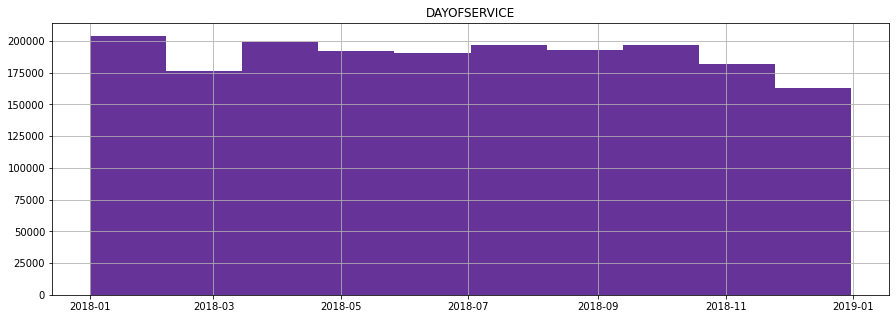

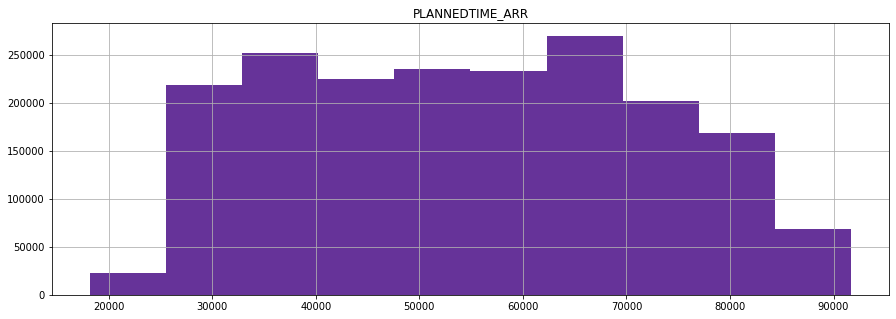

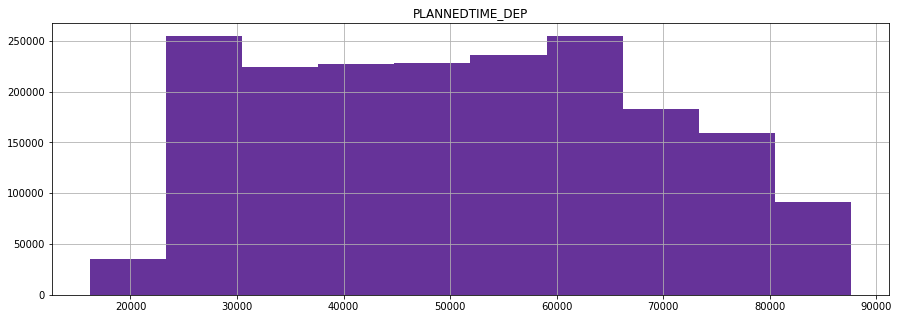

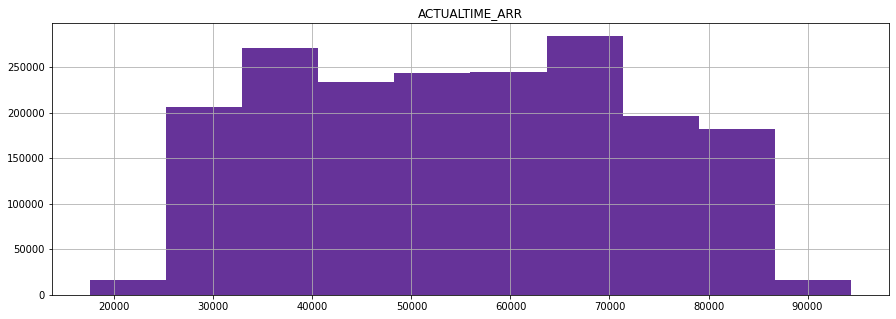

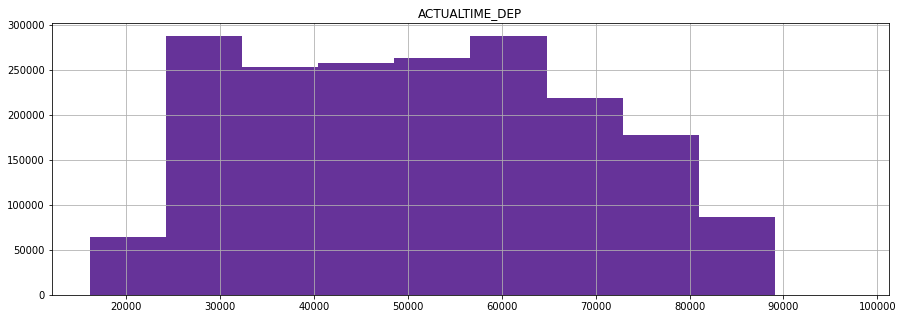

KeyError: 'LASTUPDATE'

In [40]:
continous_figs_pdf = PdfPages('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data_prep/dqr/documents/figs/dqr_trips_continuous_barcharts.pdf')
for col in continuous_cols:
 fig = df[col].hist(figsize=(15,5), color='rebeccapurple')
 plt.title(col)
 continous_figs_pdf.savefig(fig.get_figure(),bbox_inches='tight')
 plt.show()

continous_figs_pdf.close()

### Categorical features

In [24]:
# print descriptives for categorical columns
cardinality = df[categorical_cols].nunique()
cardinality

DATASOURCE              1
LINEID                130
ROUTEID               588
BASIN                   1
NOTE                46690
TRIPID             658964
DIRECTION               2
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
dtype: int64

In [25]:
null_count = df[categorical_cols].isnull().sum()
null_count

DATASOURCE               0
LINEID                   0
ROUTEID                  0
BASIN                    0
NOTE                     0
TRIPID                   0
DIRECTION                0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
dtype: int64

In [26]:
df[categorical_cols].describe()

,DATASOURCE,LINEID,ROUTEID,BASIN,NOTE,TRIPID,DIRECTION,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2182637,2182637,2182637,2182637,2182637,2182637,2182637,0,4333.0,4330.0
unique,1,130,588,1,46690,658964,2,0,1.0,3526.0
top,DB,46A,46A_74,BasDef,",2703274,",7327038,2,NaN,0.0,203708.0
freq,2182637,76728,37182,2182637,244,19,1100273,NaN,4333.0,19.0


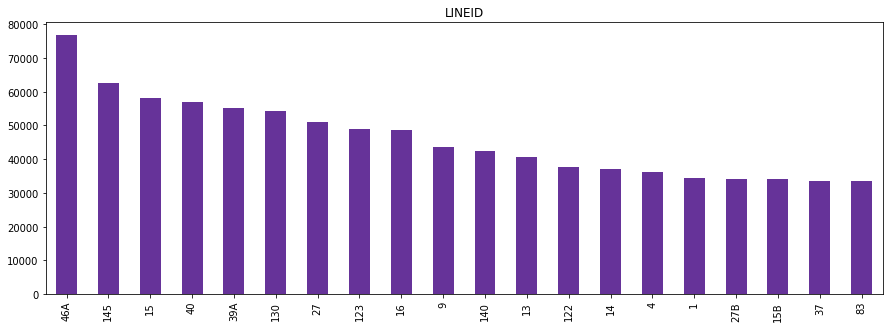

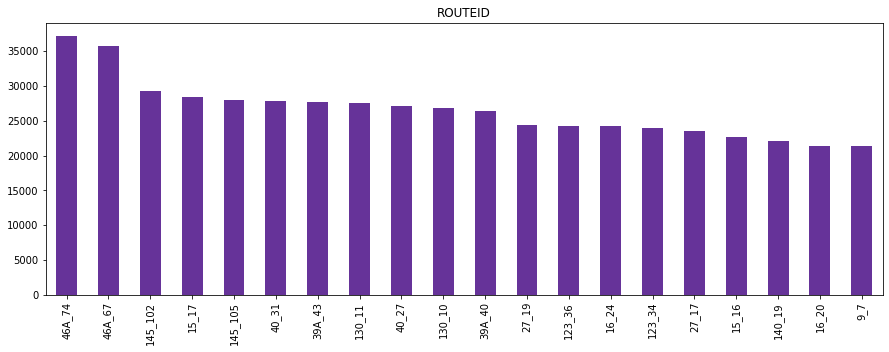

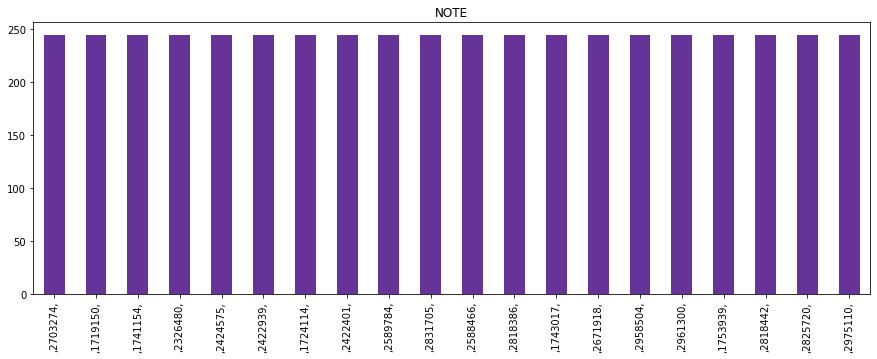

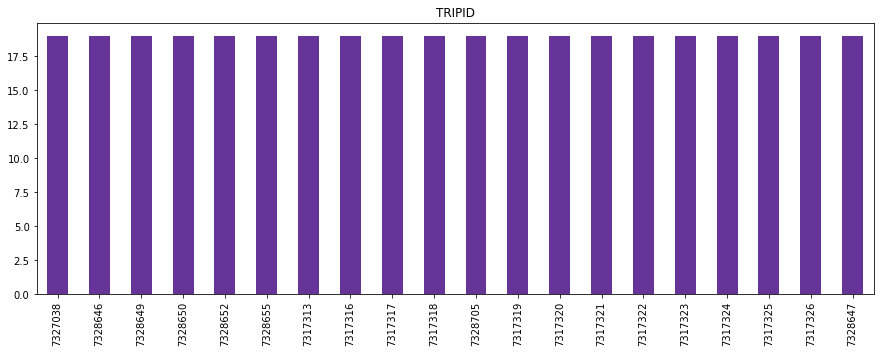

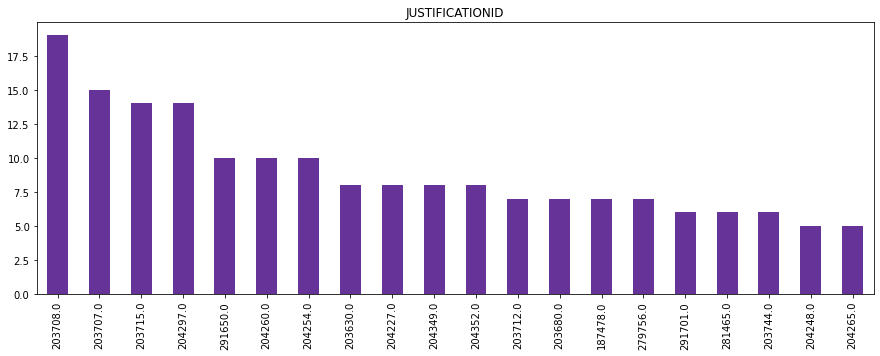

In [30]:
categorical_figs_pdf = PdfPages('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data_prep/dqr/documents/figs/dqr_trips_categorical_barcharts.pdf')

high_card_cols = df[['LINEID', 'ROUTEID', 'NOTE','TRIPID','JUSTIFICATIONID']]
for col in high_card_cols:
    fig = df[col].value_counts(dropna=True)[:20].plot(kind='bar', title=col, figsize=(15,5), color='rebeccapurple')
    plt.title(col)
    categorical_figs_pdf.savefig(fig.get_figure(),bbox_inches='tight')
    plt.show()
    
categorical_figs_pdf.close()

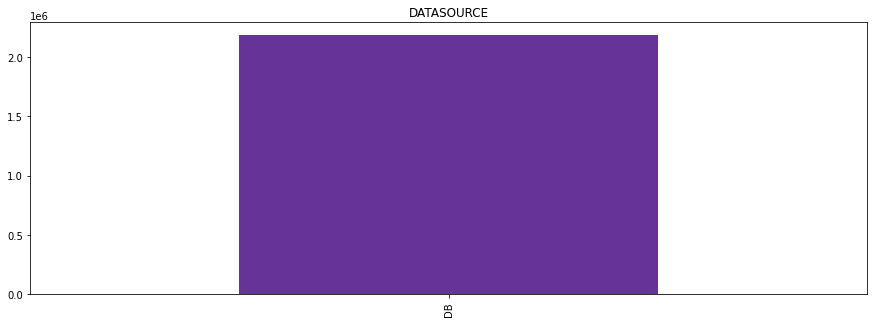

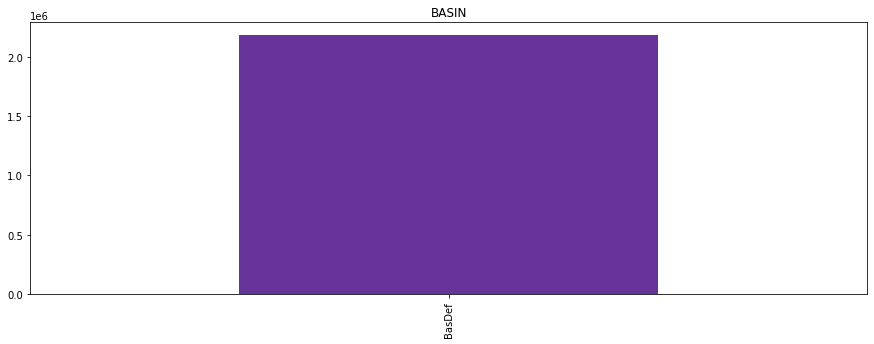

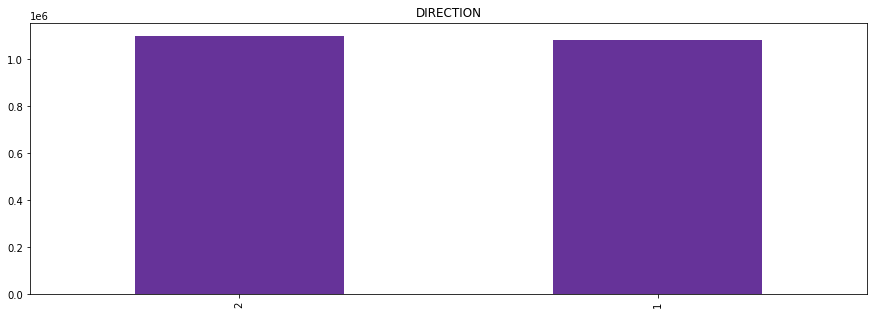

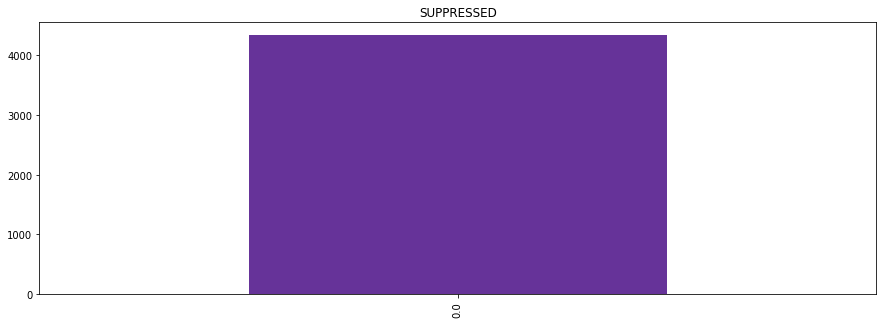

In [29]:
categorical_figs_pdf = PdfPages('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data_prep/dqr/documents/figs/dqr_trips_categorical_low_barcharts.pdf')

low_card_cols = df[['DATASOURCE','BASIN','DIRECTION','SUPPRESSED']]

for col in low_card_cols:
    fig = df[col].value_counts(dropna=True)[:20].plot(kind='bar', title=col, figsize=(15,5), color='rebeccapurple')
    plt.title(col)
    categorical_figs_pdf.savefig(fig.get_figure(),bbox_inches='tight')
    plt.show()

categorical_figs_pdf.close()

# Data Quality Plan
Initial list of issues identified in the Data Quality Report

|Feature|Data Quality Issue|Action|
|---|---|---|
|DATASOURCE|Constant column, low information gain| Drop column|
|DAYOFSERVICE|No issue|Keep column|
|TRIPID|No issue|Keep column|
|LINEID|Some lines out of service since 2018|Investigate further and drop affected rows|
|ROUTEID|Some routes out of service since 2018|Investigate further and drop affected rows|
|PLANNEDTIME_ARR|No issue|Keep column|	                 
|PLANNEDTIME_DEP|No issue|Keep column|	   
|ACTUALTIME_ARR|Missing values, arrival times less than departure|Investigate affected rows further|
|ACTUALTIME_DEP|Missing values, arrival times less than departure|Investigate affected rows further|
|BASIN|Low information gain|Drop column|
|TENDERLOT|Missing values|Drop column|
|SUPPRESSED|Low information gain|Drop column|
|JUSTIFICATIONID|Low information gain|Drop column|
|LASTUPDATE|Low information gain|Drop column|
|NOTE| Low information gain, missing values|Drop column|


In [31]:
df.drop(columns=['DATASOURCE','BASIN','TENDERLOT','SUPPRESSED','JUSTIFICATIONID','LASTUPDATE','NOTE'], inplace=True)

In [33]:
df.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/dqp_trips_cleaned.csv', index=False)

In [34]:
df['ACTUALTIME_ARR'].isnull().sum()

137207

In [35]:
df.loc[df['ACTUALTIME_ARR'].isnull()]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
21,2018-02-07,6258154,49,49_28,2,79199.0,76800.0,NaN,76850.0
49,2018-02-18,6274325,41,41_3,1,64611.0,61500.0,NaN,61517.0
85,2018-02-18,6267973,38A,38A_32,2,84532.0,81900.0,NaN,81871.0
106,2018-02-18,6274224,33B,33B_58,2,55620.0,54000.0,NaN,54003.0
127,2018-02-18,6270876,42,42_42,1,71716.0,69000.0,NaN,69082.0
...,...,...,...,...,...,...,...,...,...
2182572,2018-05-14,6751213,67,67_6,2,38665.0,34920.0,NaN,34964.0
2182581,2018-05-14,6751136,29A,29A_14,1,70859.0,68400.0,NaN,68327.0
2182600,2018-05-14,6757403,47,47_135,2,48956.0,45900.0,NaN,45868.0
2182607,2018-05-14,6762374,130,130_10,1,55595.0,53700.0,NaN,53695.0


In [36]:
df.loc[df['ACTUALTIME_DEP'].isnull()]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,2018-02-07,6262138,25B,25B_271,2,30517.0,26460.0,32752.0,NaN
24,2018-02-07,6246014,123,123_34,1,42848.0,39600.0,43203.0,NaN
34,2018-02-07,6253738,76,76_37,2,58000.0,55200.0,59381.0,NaN
46,2018-02-18,6270605,41,41_3,1,67311.0,64200.0,67296.0,NaN
50,2018-02-18,6270927,41,41_3,1,60711.0,57600.0,60459.0,NaN
...,...,...,...,...,...,...,...,...,...
2182606,2018-05-14,6762371,130,130_11,2,48237.0,46500.0,48766.0,NaN
2182622,2018-05-14,6756429,40D,40D_102,1,66268.0,63000.0,66445.0,NaN
2182623,2018-05-14,6767663,40D,40D_104,2,44194.0,41400.0,44430.0,NaN
2182634,2018-05-14,6765486,33D,33D_62,2,29460.0,26400.0,29904.0,NaN


In [37]:
df = df[df['ACTUALTIME_DEP'].notna()]
df = df[df['ACTUALTIME_ARR'].notna()]

In [38]:
df.reset_index(drop=True)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245.0,84600.0,87524.0,84600.0
1,2018-02-07,6254942,45A,45A_70,2,35512.0,32100.0,36329.0,32082.0
2,2018-02-07,6259460,25A,25A_273,1,57261.0,54420.0,58463.0,54443.0
3,2018-02-07,6253175,14,14_15,1,85383.0,81600.0,84682.0,81608.0
4,2018-02-07,6248240,77A,77A_28,2,41648.0,37200.0,42019.0,37538.0
...,...,...,...,...,...,...,...,...,...
1893362,2018-05-14,6765652,53,53_21,2,30626.0,29100.0,30482.0,29119.0
1893363,2018-05-14,6765662,53,53_21,2,65950.0,64800.0,66270.0,64815.0
1893364,2018-05-14,6765828,45A,45A_68,1,28647.0,25800.0,28688.0,25858.0
1893365,2018-05-14,6765849,123,123_36,2,61560.0,57840.0,61365.0,57859.0


In [39]:
df.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/dqp_trips_cleaned.csv', index=False)